# Pyber Challenge

### Loading and Reading CSV files

In [202]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [203]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [204]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
rural_ride_count = ride_count[0]
suburban_ride_count = ride_count[1]
urban_ride_count = ride_count[2]

In [205]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
rural_driver_count = driver_count[0]
suburban_driver_count = driver_count[1]
urban_driver_count = driver_count[2]

In [206]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
rural_total_fares = total_fares[0]
suburban_total_fares = total_fares[1]
urban_total_fares = total_fares[2]

In [207]:
#  4. Get the average fare per ride for each city type. 
avg_fares = pyber_data_df.groupby(["type"]).mean()["fare"]
rural_avg_fares = avg_fares[0]
suburban_avg_fares = avg_fares[1]
urban_avg_fares = avg_fares[2]

In [208]:
# 5. Get the average fare per driver for each city type. 
rural_fare_per_driver = rural_total_fares / rural_driver_count
suburban_fare_per_driver = suburban_total_fares / suburban_driver_count
urban_fare_per_driver = urban_total_fares / urban_driver_count


In [209]:
#  6. Create a PyBer summary DataFrame. 
data = [[rural_ride_count,rural_driver_count,rural_total_fares,rural_avg_fares,rural_fare_per_driver],[suburban_ride_count,suburban_driver_count,suburban_total_fares,suburban_avg_fares,suburban_fare_per_driver],[urban_ride_count,urban_driver_count,urban_total_fares,urban_avg_fares,urban_fare_per_driver]]
pyber_summary_df = pd.DataFrame(data,columns=["Total Rides","Total Drivers","Total Fares","Average Fares","Average Fare per Driver"],index=["Rural","Suburban","Urban"])
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fares,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [210]:
#  7. Cleaning up the DataFrame (if necessary). Delete the index name
pyber_summary_df.index.name = None

In [211]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fares"] = pyber_summary_df["Average Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [212]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550000e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.020000e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.780000e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.260000e+12,4,Rural


In [213]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_by_city_type = pyber_data_df.groupby(by=["type","date"]).sum()['fare']
total_fare_by_city_type = pd.DataFrame(data=total_fare_by_city_type)
total_fare_by_city_type

fare
type  date                
Rural 1/1/19 9:45    43.69
      1/11/19 4:39   16.42
      1/14/19 15:58  54.10
      1/14/19 7:09   18.05
      1/15/19 21:44  30.26
...                    ...
Urban 5/8/19 1:54    32.69
      5/8/19 2:31    41.33
      5/8/19 4:20    21.99
      5/8/19 4:39    18.45
      5/8/19 7:29    18.55

[2364 rows x 1 columns]

In [214]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
total_fare_by_city_type = total_fare_by_city_type.reset_index()
total_fare_by_city_type

,type,date,fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26
...,...,...,...
2359,Urban,5/8/19 1:54,32.69
2360,Urban,5/8/19 2:31,41.33
2361,Urban,5/8/19 4:20,21.99
2362,Urban,5/8/19 4:39,18.45


In [231]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot = total_fare_by_city_type.pivot(index='date',columns='type',values='fare')
pivot.index = pd.to_datetime(pivot.index)
pivot.sort_index(inplace=True, ascending=True)

In [284]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_to_april = pivot.loc['2019-01-01':'2019-4-29']
jan_to_april

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:00,NaN,NaN,28.41
2019-04-29 21:20:00,NaN,NaN,13.59
2019-04-29 22:08:00,NaN,25.75,NaN


In [276]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_to_april.index = pd.to_datetime(jan_to_april.index)

In [277]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_to_april.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [280]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_to_april_weekly = jan_to_april.resample('W-Mon').sum()
jan_to_april_weekly 

type,Rural,Suburban,Urban
date,,,
2019-01-07,187.92,876.61,1879.70
2019-01-14,139.80,1080.40,2193.36
2019-01-21,233.85,1163.93,2105.90
2019-01-28,210.94,1285.13,1846.98
2019-02-04,361.50,1079.58,2085.77
2019-02-11,81.91,879.92,2200.85
2019-02-18,140.52,1394.86,2389.68
2019-02-25,448.07,1067.99,2156.88
2019-03-04,75.65,836.61,2619.82


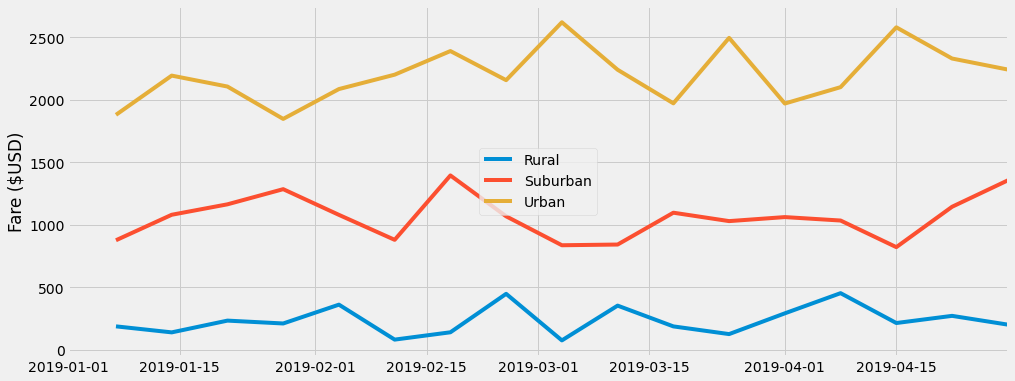

In [283]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(jan_to_april_weekly)
#ax.set_xlim(pd.to_datetime('2019-01-01'),pd.to_datetime('2019-04-29'))
ax.set_ylabel('Fare ($USD)')
ax.legend(['Rural', 'Suburban', 'Urban'])